**Copyright 2020 Marcel Arpogaus**

    Licensed under the Apache License, Version 2.0 (the "License");
    you may not use this file except in compliance with the License.
    You may obtain a copy of the License at
 
        http://www.apache.org/licenses/LICENSE-2.0
 
    Unless required by applicable law or agreed to in writing, software
    distributed under the License is distributed on an "AS IS" BASIS,
    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    See the License for the specific language governing permissions and
    limitations under the License.

# Introduction

## Motivation: Need for Complex Distributions

The shape of the data distribution in many real applications are very complex.
Transformation models are an easy way to replace simple Distributions (like a Gaussian) with more expressive ones.

| Gaussian                                                     | Transformation Model                       |
|:-------------------------------------------------------------|:-------------------------------------------|
| ![gauss](gfx/gauss.png)                                      | ![flow](gfx/flow.png)                      |

## Purpose of this Notebook

You will learn how to fit a ANN to simple (unconditional) bimodal data using a Transformed Distribution.

We wont cover any of the theoretical fundamentals here.
A basic introduction can be found in [this Notebook](TheoreticalBackground.ipynb), for additional information references to the primary sources are provided.

If you have any technical issues or suggestion regarding my implementation, please feel free to either [contact me](mailto:marcel.arpogaus@gmail.com), [open an issue](https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/issues/new) or send me a [Pull Request](https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector#contributing).

Any contributions are **greatly appreciated**.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation:-Need-for-Complex-Distributions" data-toc-modified-id="Motivation:-Need-for-Complex-Distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation: Need for Complex Distributions</a></span></li><li><span><a href="#Purpose-of-this-Notebook" data-toc-modified-id="Purpose-of-this-Notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose of this Notebook</a></span></li><li><span><a href="#Dependencies-&amp;-Prerequisites" data-toc-modified-id="Dependencies-&amp;-Prerequisites-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dependencies &amp; Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Install-Dependencies" data-toc-modified-id="Install-Dependencies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Install Dependencies</a></span></li><li><span><a href="#Import-Libaries" data-toc-modified-id="Import-Libaries-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Import Libaries</a></span></li><li><span><a href="#Ensure-Reproducibility" data-toc-modified-id="Ensure-Reproducibility-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ensure Reproducibility</a></span></li></ul></li><li><span><a href="#Function-Definitions" data-toc-modified-id="Function-Definitions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Function Definitions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#TensorFlow-Dataset-API" data-toc-modified-id="TensorFlow-Dataset-API-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TensorFlow Dataset API</a></span></li></ul></li><li><span><a href="#Fitting-a-Gaussian-to-the-data" data-toc-modified-id="Fitting-a-Gaussian-to-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fitting a Gaussian to the data</a></span><ul class="toc-item"><li><span><a href="#Output-Distribution" data-toc-modified-id="Output-Distribution-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Output Distribution</a></span></li><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Sample</a></span></li></ul></li><li><span><a href="#Fitting-the-Normalizing-Flow-to-the-data" data-toc-modified-id="Fitting-the-Normalizing-Flow-to-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fitting the Normalizing Flow to the data</a></span><ul class="toc-item"><li><span><a href="#Probability-Model" data-toc-modified-id="Probability-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Probability Model</a></span></li><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Sample</a></span></li></ul></li></ul></div>

##  Dependencies & Prerequisites

### Install Dependencies

In [1]:
try:
    from google.colab import drive

    !pip install git+https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector.git
except:
    print("Not running in Colab")

Not running in Colab


### Import Libaries

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="paper")  # improved plt styles

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow_probability import distributions as tfd

2022-11-11 11:30:34.083993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 11:30:34.084017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
print("TFP Version", tfp.__version__)
print("TF  Version", tf.__version__)

TFP Version 0.16.0
TF  Version 2.9.2


Import The transformed distribution:

In [6]:
from bernstein_flow.distributions import BernsteinFlow
from bernstein_flow.util.visualization import plot_flow

### Ensure Reproducibility

In [7]:
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

## Function Definitions

We want to minimize the negative log-likelihood:

In [8]:
def negloglik(y_true, y_hat):
    nll = -y_hat.log_prob(y_true)
    return nll

## Data

Classic dataset containing the waiting time between eruptions and the duration of the eruption for the [Old Faithful Geyser](https://en.wikipedia.org/wiki/Old_Faithful) in [Yellowstone National Park](https://en.wikipedia.org/wiki/Yellowstone_National_Park).

Extracted from the [built-in dataset in R](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html).

Reference:  A. Azzalini and A. W. Bowman, “A Look at Some Data on the Old Faithful Geyser,” Journal of the Royal Statistical Society. Series C (Applied Statistics), vol. 39, no. 3, pp. 357–365, 1990, doi: 10.2307/2347385.

In [9]:
y = np.asarray(
    (
        0.6694,
        0.3583,
        0.6667,
        0.6667,
        0.6667,
        0.3333,
        0.7306,
        0.7139,
        0.3389,
        0.8056,
        0.3056,
        0.9083,
        0.2694,
        0.8111,
        0.7306,
        0.2944,
        0.7778,
        0.3333,
        0.7889,
        0.7028,
        0.3167,
        0.8278,
        0.3333,
        0.6667,
        0.3333,
        0.6667,
        0.4722,
        0.75,
        0.6778,
        0.6194,
        0.5861,
        0.7444,
        0.3694,
        0.8139,
        0.4333,
        0.6917,
        0.3667,
        0.7944,
        0.3056,
        0.7667,
        0.3778,
        0.6889,
        0.3333,
        0.6667,
        0.3333,
        0.6667,
        0.3139,
        0.7111,
        0.3472,
        0.7444,
        0.4167,
        0.6667,
        0.2944,
        0.7222,
        0.3639,
        0.7472,
        0.6472,
        0.5556,
        0.6222,
        0.6667,
        0.325,
        0.8778,
        0.3333,
        0.6667,
        0.3333,
        0.6667,
        0.3333,
        0.6667,
        0.5889,
        0.3611,
        0.75,
        0.3361,
        0.6917,
        0.7,
        0.7222,
        0.3222,
        0.775,
        0.6361,
        0.6722,
        0.6944,
        0.7778,
        0.3028,
        0.6667,
        0.5,
        0.6667,
        0.3333,
        0.7417,
        0.3417,
        0.7083,
        0.3194,
        0.7778,
        0.2889,
        0.7306,
        0.2944,
        0.7667,
        0.3111,
        0.7417,
        0.2722,
        0.8389,
        0.3028,
        0.85,
        0.2722,
        0.7139,
        0.3333,
        0.6667,
        0.3333,
        0.7556,
        0.3333,
        0.6667,
        0.4889,
        0.7889,
        0.65,
        0.325,
        0.6861,
        0.3,
        0.7778,
        0.3056,
        0.7833,
        0.3528,
        0.7972,
        0.3028,
        0.6833,
        0.775,
        0.6667,
        0.3333,
        0.6667,
        0.6667,
        0.7028,
        0.6889,
        0.6556,
        0.625,
        0.7361,
        0.4111,
        0.6944,
        0.6333,
        0.7194,
        0.6444,
        0.7806,
        0.2833,
        0.8278,
        0.7111,
        0.7639,
        0.6667,
        0.6667,
        0.6667,
        0.6667,
        0.3306,
        0.7667,
        0.1389,
        0.8194,
        0.2889,
        0.7639,
        0.2833,
        0.7917,
        0.3056,
        0.75,
        0.3111,
        0.7417,
        0.7417,
        0.6667,
        0.8,
        0.6667,
        0.6667,
        0.3333,
        0.6667,
        0.3222,
        0.7639,
        0.3333,
        0.6167,
        0.4778,
        0.8056,
        0.575,
        0.7306,
        0.3,
        0.7333,
        0.4139,
        0.7528,
        0.35,
        0.725,
        0.7278,
        0.2972,
        0.8194,
        0.3028,
        0.6667,
        0.6667,
        0.6667,
        0.6444,
        0.3083,
        0.7833,
        0.3361,
        0.7444,
        0.3111,
        0.6944,
        0.3167,
        0.7083,
        0.5417,
        0.7028,
        0.3139,
        0.8306,
        0.3083,
        0.6667,
        0.3278,
        0.7944,
        0.6667,
        0.3333,
        0.6667,
        0.6667,
        0.3972,
        0.7361,
        0.7028,
        0.7278,
        0.3333,
        0.7417,
        0.2917,
        0.75,
        0.2694,
        0.7833,
        0.4278,
        0.6167,
        0.7056,
        0.3222,
        0.725,
        0.6667,
        0.6667,
        0.6667,
        0.7028,
        0.6667,
        0.6889,
        0.3139,
        0.7444,
        0.325,
        0.7028,
        0.2861,
        0.7417,
        0.7083,
        0.6611,
        0.7306,
        0.3278,
        0.7417,
        0.7111,
        0.3194,
        0.7361,
        0.5,
        0.6667,
        0.3333,
        0.6667,
        0.5472,
        0.3056,
        0.7694,
        0.3056,
        0.7694,
        0.7667,
        0.7083,
        0.3222,
        0.8306,
        0.3278,
        0.7167,
        0.7,
        0.7556,
        0.7333,
        0.7694,
        0.3333,
        0.6667,
        0.6667,
        0.6528,
        0.3333,
        0.75,
        0.3,
        0.6667,
        0.4583,
        0.7889,
        0.6611,
        0.325,
        0.8278,
        0.3083,
        0.8,
        0.6667,
        0.6667,
        0.6667,
        0.6667,
        0.6667,
        0.6667,
        0.6667,
        0.3333,
        0.6667,
        0.3222,
        0.7222,
        0.2778,
        0.7944,
        0.325,
        0.7806,
        0.3222,
        0.7361,
        0.3556,
        0.6806,
        0.3444,
        0.6667,
        0.6667,
        0.3333,
    ),
    np.float32,
)

In [10]:
x = np.ones((y.shape[0], 1))  # We us ones to mimic unconditional data

### TensorFlow Dataset API

[`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API supports writing descriptive and efficient input pipelines

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=len(y))
dataset = dataset.batch(32)
dataset = dataset.prefetch(1)
dataset

2022-11-11 11:30:37.312837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-11 11:30:37.312874: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-11 11:30:37.312897: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch.microos-tp): /proc/driver/nvidia/version does not exist
2022-11-11 11:30:37.313267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

## Fitting a Gaussian to the data

### Model Definition

In [12]:
set_seed(1)
gauss_model = tf.keras.Sequential()
gauss_model.add(InputLayer(input_shape=(1)))
# Here could come a gigantus network
gauss_model.add(Dense(2))  # We need to model the mean and the std of a Gaussian
gauss_model.add(
    tfp.layers.DistributionLambda(
        lambda pv: tfd.Normal(
            loc=pv[:, 0], scale=1e-3 + tf.math.softplus(0.05 * pv[:, 1])
        )
    )
)
gauss_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
gauss_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 distribution_lambda (Distri  ((None,),                0         
 butionLambda)                (None,))                           
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Training

In [13]:
hist = gauss_model.fit(dataset, epochs=1000, verbose=False)

(<AxesSubplot: >, -0.23894625902175903)

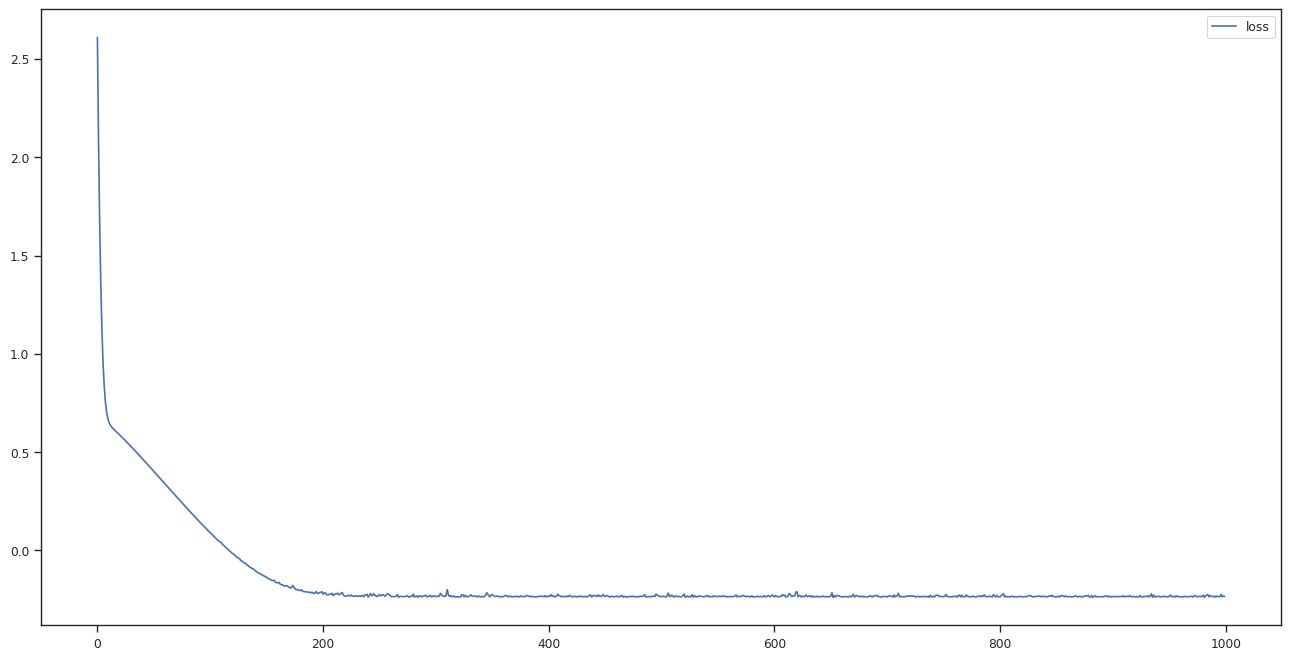

In [14]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(figsize=(16, 8)), hist_df.loss.min()

### Result

In [15]:
# Get the distribution for a single x-values (unconditioned so they are all 1)
gauss = gauss_model(np.ones((1, 1), dtype="float32"))

In [16]:
times = np.linspace(0, 1.2)
gp = tf.exp(gauss.log_prob(times))

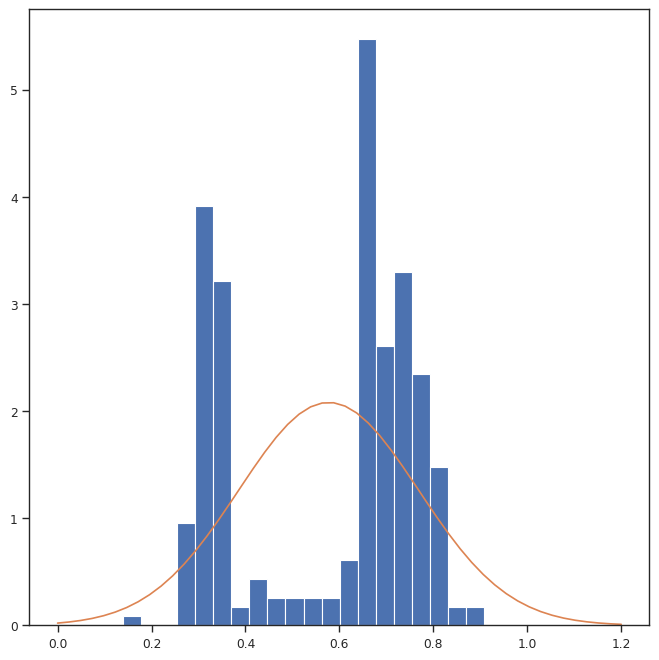

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.hist(y, 20, density=True)
plt.plot(times, gp)

As you can see the normal distribution is not flexible enough to represent the data source.

### Sample

In [18]:
samples = gauss.sample(len(y))
df = pd.DataFrame(dict(y=y, samples=samples.numpy().flatten()))

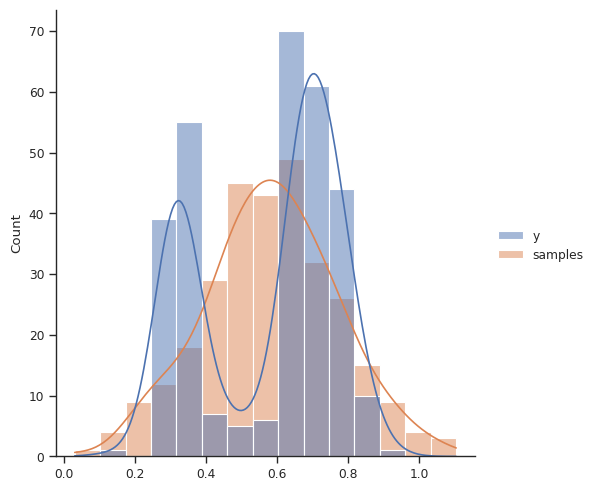

In [19]:
sns.displot(data=df, kde=True)

## Fitting the Normalizing Flow to the data

### Model Definition

In [20]:
bernstein_order = 15

In [21]:
set_seed(1)
flow_model = tf.keras.Sequential()
flow_model.add(InputLayer(input_shape=(1)))
# Here could come a gigantus network
flow_model.add(
    Dense(4 + bernstein_order)
)  # Bernstein coefficients and 2 times scale and shift
flow_model.add(
    tfp.layers.DistributionLambda(BernsteinFlow.from_pvector)
)  # <--- Replace the Normal distribution with the Transformed Distribution
flow_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
flow_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 19)                38        
                                                                 
 distribution_lambda_1 (Dist  (None, None)             0         
 ributionLambda)                                                 
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


### Training

In [22]:
hist = flow_model.fit(dataset, epochs=1000, verbose=False)

(<AxesSubplot: >, -0.7590529918670654)

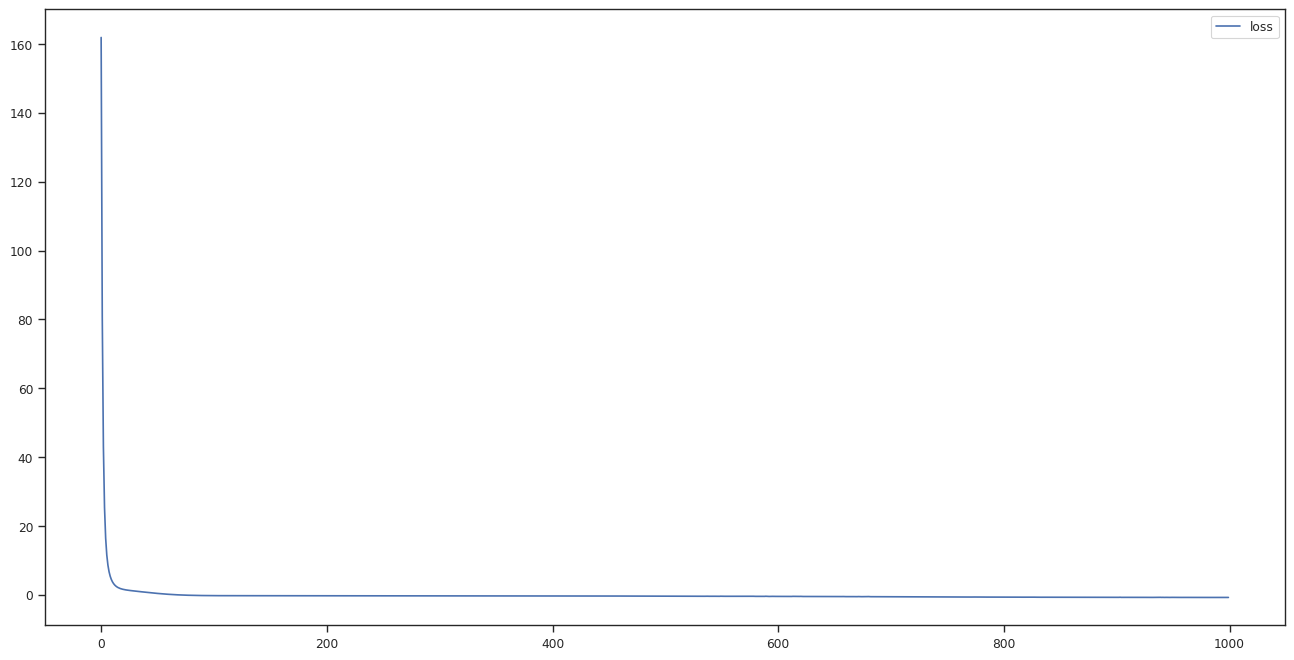

In [23]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(figsize=(16, 8)), hist_df.loss.min()

### Result

In [24]:
# Get the distribution for a single x-values (unconditioned so they are all 1)
flow = flow_model(np.ones((1, 1), dtype="float32"))
flow

<tfp.distributions._TensorCoercible 'tensor_coercible' batch_shape=[] event_shape=[] dtype=float32>

In [25]:
flow.parameters

{'thetas': <tf.Tensor: shape=(16,), dtype=float32, numpy=
 array([-4.732582  , -4.6279593 , -1.9454012 , -0.33797288, -0.31969613,
        -0.31238294, -0.30830324, -0.30489507, -0.30168045, -0.2968958 ,
        -0.2916819 , -0.26448205, -0.19177115,  0.8524288 ,  2.7796433 ,
         3.9494083 ], dtype=float32)>,
 'a1': <tf.Tensor: shape=(), dtype=float32, numpy=5.824658>,
 'b1': <tf.Tensor: shape=(), dtype=float32, numpy=-2.894927>,
 'a2': <tf.Tensor: shape=(), dtype=float32, numpy=1.3448484>,
 'base_distribution': None,
 'clip_to_bernstein_domain': True,
 'clip_base_distribution': False,
 'bb_class': bernstein_flow.bijectors.bernstein.BernsteinBijector,
 'name': 'sequential_1/distribution_lambda_1/from_pvector/BernsteinFlow/'}

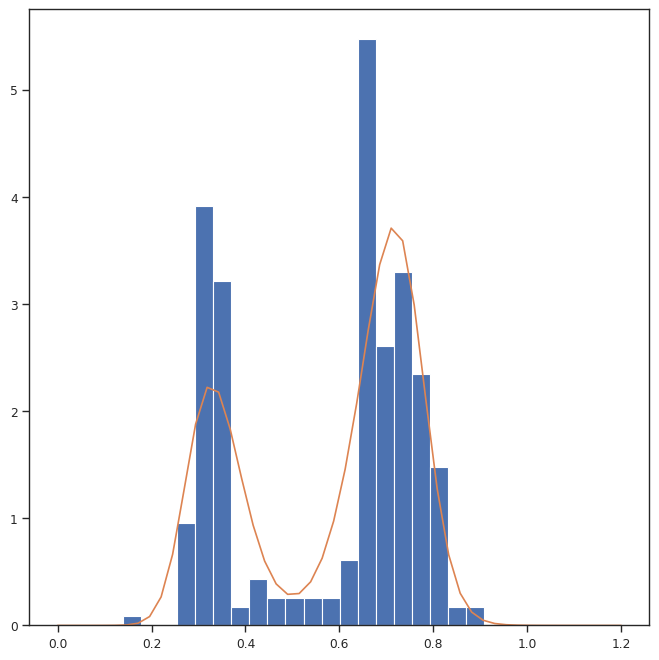

In [26]:
times = np.linspace(0, 1.2)
fp = flow.prob(times)

fig = plt.figure(figsize=(8, 8))
plt.hist(y, 20, density=True)
plt.plot(times, fp)

The Normalizng Flow is flexible enough to represent even very non Gaussian Distributions.

### Sample

In [27]:
flow.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4479508>

In [28]:
samples = flow.sample(len(y))
df = pd.DataFrame(dict(y=y, samples=samples))

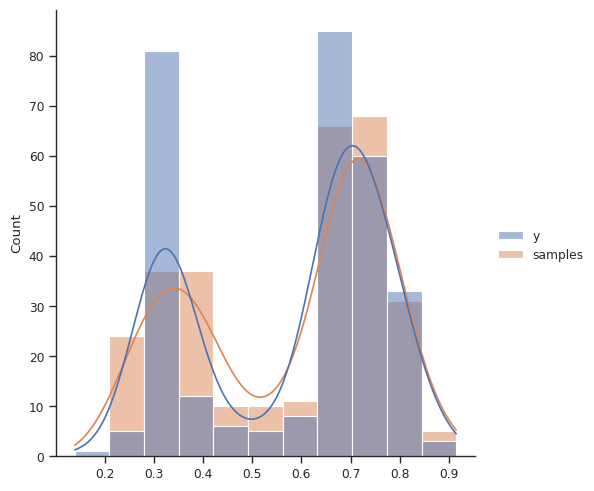

In [29]:
sns.displot(data=df, kde=True)

### Plot Flow

/home/work/mambaforge/envs/bnf/lib/python3.8/site-packages/matplotlib/patches.py:4590: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)
/home/work/mambaforge/envs/bnf/lib/python3.8/site-packages/matplotlib/patches.py:4590: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


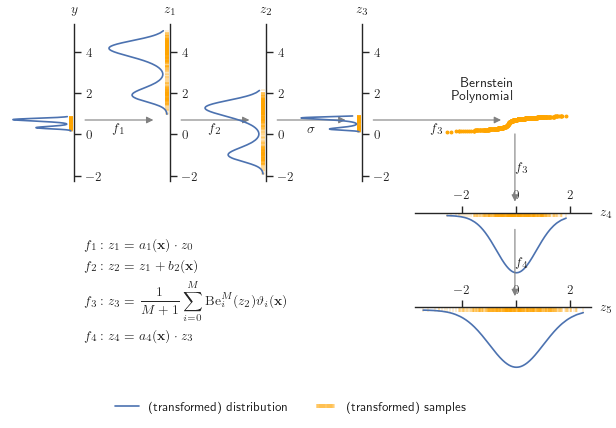

In [30]:
fig = plot_flow(flow)

## Fitting the Normalizing Flow to the data only using te Bernstein Polynomial

Since the date is within the range [0, 1] we can even fit a flow only using the Bernstein Polyinomial Bijector.

### Model Definition

In [31]:
bernstein_order = 15

In [32]:
from bernstein_flow.activations import get_thetas_constrain_fn
from bernstein_flow.bijectors.bernstein_extra import BernsteinBijectorLinearExtrapolate
from bernstein_flow.util import gen_flow

We need to apply some additional constrains on the Bernstein polynomial to ensure optimal convergence.

In [33]:
thetas_constrain_fn = get_thetas_constrain_fn(
    low=-3,  # lower bound of Bernstein polynomial
    high=3,  # upper bound of Bernstein polynomial
    smooth_bounds=True,  # enshure smoothness when leaving the Bernstein domain and entering the interpolation range
    allow_flexible_bounds=True,  # allow the model to adjust the given bounds
    # fn=tf.softplus,  # change function applied unconstrained parameters
    # eps=1e-5  # define a minimal distance between the bernstein coeficents to improve numerical stability
)

We require that the transformation covers at least the range $[-3,3]$, i.e., $\pm 3\sigma$ of the standard Gaussian.

Since the boundaries of Bernstein polynomials are given by their first and last coefficient ($f_{2}(0)=\vartheta_{0}$ and $f_{2}(1)=\vartheta_{M}$), we simply scale tham to the desired range:

In [34]:
thetas_constrain_fn([-1, 2, 7, 2, -12])

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([-3.3132617, -2.4474297, -1.5815976,  1.2683411,  2.1341732,
        3.0000052], dtype=float32)>

In [35]:
set_seed(1)
flow2_model = tf.keras.Sequential()
flow2_model.add(InputLayer(input_shape=(1)))
# Here could come a gigantus network
flow2_model.add(
    Dense(2 + bernstein_order)
)  # Bernstein coefficients and 2 times scale and shift
flow2_model.add(
    tfp.layers.DistributionLambda(  # <--- Replace the Normal distribution with the Transformed Distribution
        gen_flow(
            bb_class=BernsteinBijectorLinearExtrapolate,  # uses Bijecter with linear extrapolation
            thetas_constrain_fn=thetas_constrain_fn,  # ensures ascendieng order and applies constrains on NN outputs
            scale_data=False,  # Allows to disable the scaling bijetcor
            shift_data=False,  # Allows to disable the shift bijetcor
            scale_base_distribution=False,  # Allows to disable the scaling of the base distribution
            clip_to_bernstein_domain=False,  # Allows to disable the sigmoid function
            clip_base_distribution=False,  # Allows the base distribution to be trimmed to the given interval
        )
    )
)
flow2_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
flow2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 17)                34        
                                                                 
 distribution_lambda_2 (Dist  (None, None)             0         
 ributionLambda)                                                 
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


### Training

In [36]:
hist = flow2_model.fit(dataset, epochs=1000, verbose=False)

(<AxesSubplot: >, -0.7372936010360718)

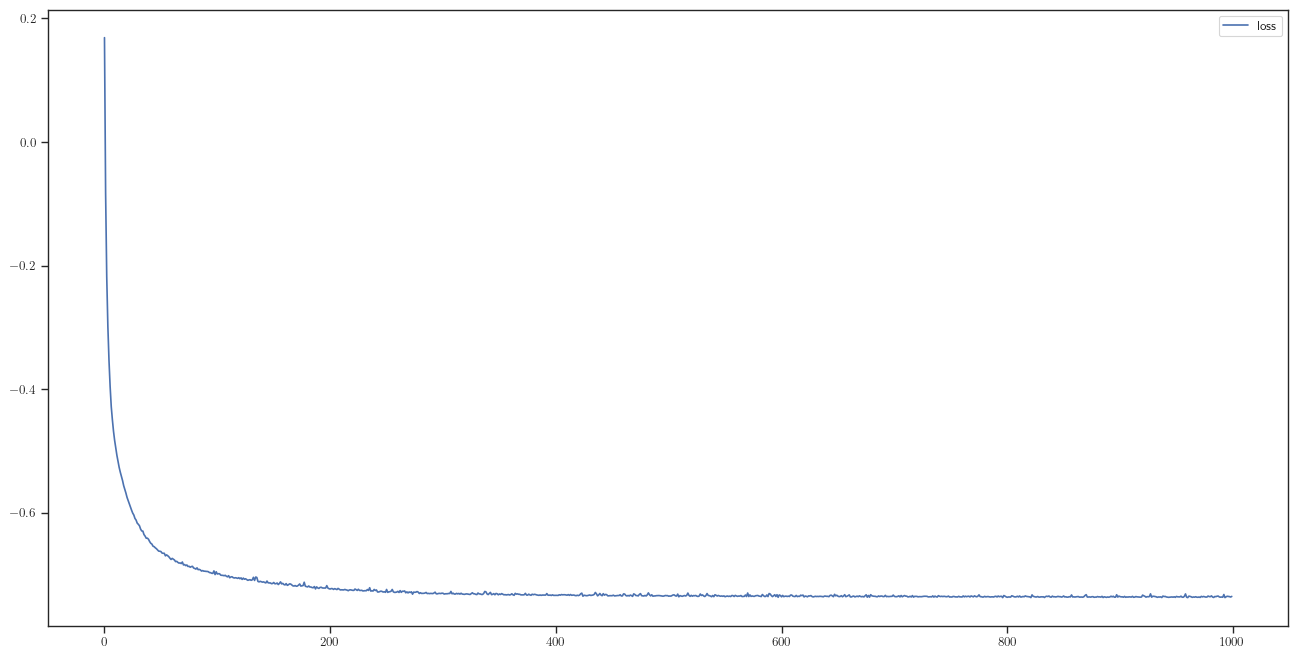

In [37]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(figsize=(16, 8)), hist_df.loss.min()

### Result

In [38]:
# Get the distribution for a single x-values (unconditioned so they are all 1)
flow2 = flow2_model(np.ones((1, 1), dtype="float32"))

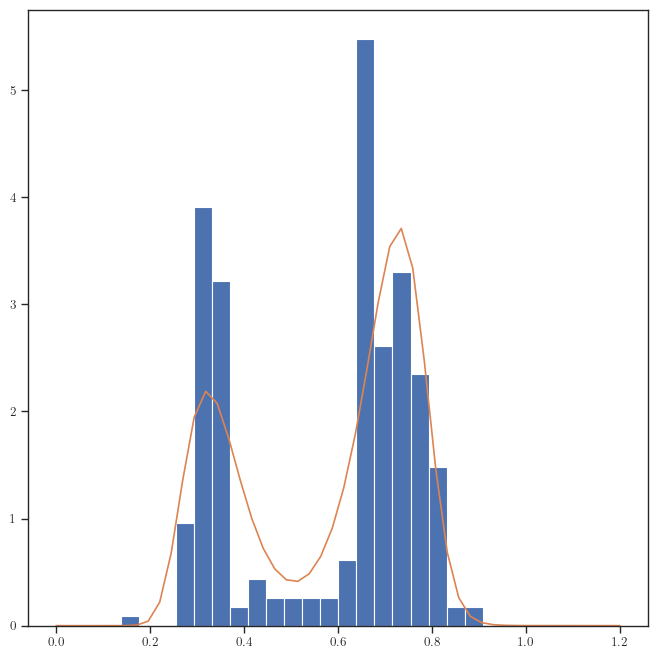

In [39]:
times = np.linspace(0, 1.2)
fp = flow2.prob(times)

fig = plt.figure(figsize=(8, 8))
plt.hist(y, 20, density=True)
plt.plot(times, fp)

The Normalizng Flow is flexible enough to represent even very non Gaussian Distributions.

In [40]:
thetas = flow2.bijector.bijector.bijectors[0].thetas

In [41]:
print(
    f"""
thetas = {repr(thetas.numpy())}
"""
)


thetas = array([-6.636261  , -6.607088  , -6.577915  , -4.1523423 , -0.3827417 ,
       -0.38142702, -0.3813605 , -0.38132688, -0.3813051 , -0.38127893,
       -0.38125265, -0.38122317, -0.38115266, -0.37815097,  2.8339045 ,
        3.4713547 ,  3.5480056 ,  3.6246564 ], dtype=float32)



### Sample

In [42]:
samples = flow2.sample(len(y))
df = pd.DataFrame(dict(y=y, samples=samples))

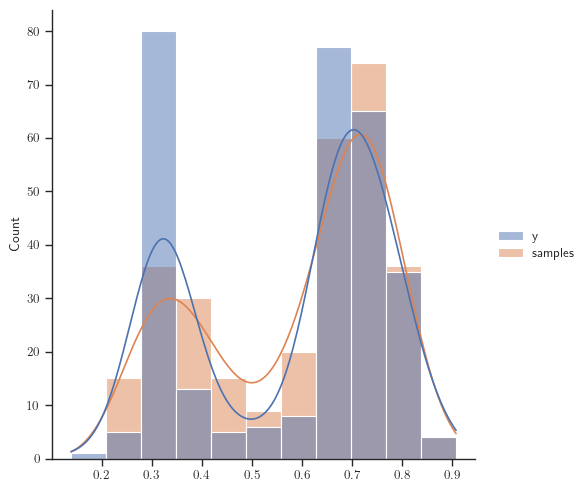

In [43]:
sns.displot(data=df, kde=True)

### Plot Flow

/home/work/mambaforge/envs/bnf/lib/python3.8/site-packages/matplotlib/patches.py:4590: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)
/home/work/mambaforge/envs/bnf/lib/python3.8/site-packages/matplotlib/patches.py:4590: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


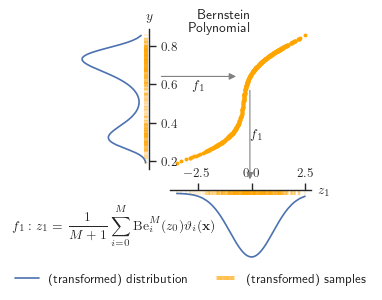

In [44]:
fig = plot_flow(flow2)